# Visualizing the electricity generation sources in Iowa between 2000-2017

Using the "Iowa electricity" dataset from the Vega Datasets library

In [4]:
import altair as alt
from vega_datasets import data

# Run this once per session, enables Altair rendering
alt.renderers.enable("notebook")

# Define dataframe as the iowa electricity dataset
df = data.iowa_electricity()

# Display sample of data format
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


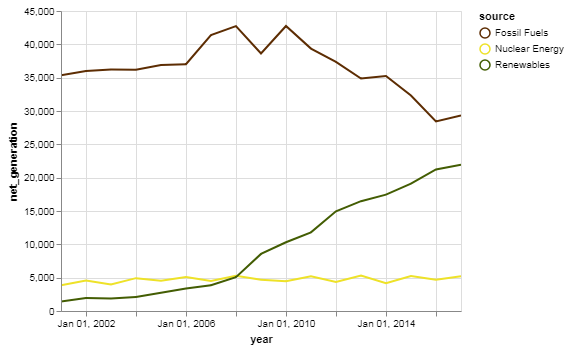

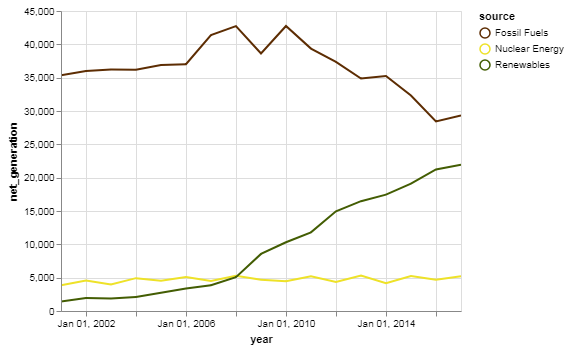

In [23]:
scale = alt.Scale(domain=['Fossil Fuels', 'Nuclear Energy', 'Renewables'],
                  range=['#5D2D03', '#EEE228', '#435D03'])

# Create a multiseries line chart
alt.Chart(df).mark_line().encode(
    alt.X("year:T"),
    alt.Y("net_generation:Q"),
    alt.Color("source:N", scale = scale)
).interactive()

Chart shows a decline in electricity generation from fossil fuels starting in 2010 and a gradual increase in electricity generation from renewable energy sources. Electricity generation from Nuclear powerplants remains fairly constant.

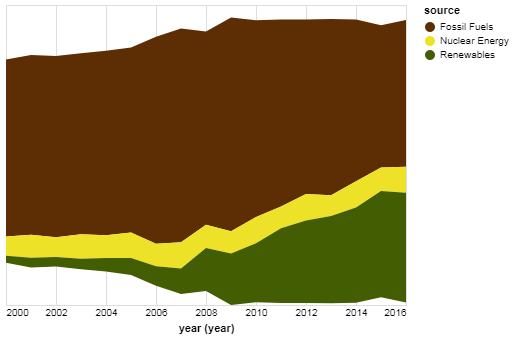

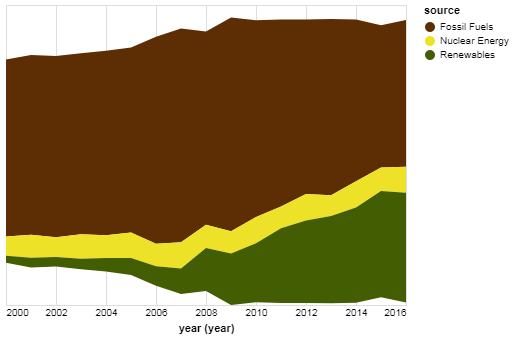

In [17]:
# Creating a stream graph of yearly net electricity generation in Iowa
alt.Chart(df).mark_area().encode(
    alt.X('year:T',
        timeUnit='year',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(net_generation):Q', stack='center', axis=None),
    alt.Color('source:N',
        scale=scale
    )
).interactive()

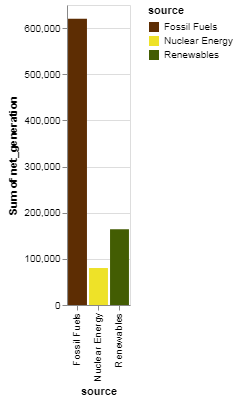

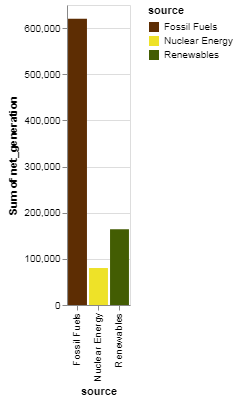

In [18]:
# Creating a bar chart of net electricity generation by each source during years 2000-2017 
alt.Chart(df).mark_bar().encode(
    alt.X("source:N"),
    alt.Y("sum(net_generation)"),
    alt.Color("source:N", scale = scale)
)